In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor
import json
import warnings
import session_info

### Importing an extension of the "missing" functions from Pandas

In [33]:
%run utils/u.0.0-pandas_missing_extension.ipynb

### Importing DataFrame Functions

In [86]:
%run utils/u.0.1-df_functions.ipynb

### Getting the interim data

In [87]:
arg_di_df = pd.read_csv("../data/interim/WDICSV_INTERIM.csv").clean_names(case_type="snake")
print(arg_di_df.shape)
arg_di_df.info()

(64, 97)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      64 non-null     int64  
 1   eg_elc_accs_zs            33 non-null     float64
 2   fx_own_totl_zs            4 non-null      float64
 3   fx_own_totl_ol_zs         4 non-null      float64
 4   fx_own_totl_40_zs         4 non-null      float64
 5   fx_own_totl_pl_zs         4 non-null      float64
 6   fx_own_totl_60_zs         4 non-null      float64
 7   fx_own_totl_so_zs         4 non-null      float64
 8   fx_own_totl_yg_zs         4 non-null      float64
 9   per_si_allsi_adq_pop_tot  12 non-null     float64
 10  per_allsp_adq_pop_tot     12 non-null     float64
 11  per_sa_allsa_adq_pop_tot  12 non-null     float64
 12  per_lm_alllm_adq_pop_tot  10 non-null     float64
 13  se_prm_tenr               26 non-null     float64
 14  sl_

### Setting initial plots styles

In [88]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

### First missing variables summaries

In [89]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
38,se_ter_cuat_ms_zs,64,64,100.0
14,sl_tlf_0714_sw_tm,64,64,100.0
39,se_ter_cuat_do_zs,64,64,100.0
34,se_sec_cuat_po_zs,64,64,100.0
32,se_ter_cuat_ba_zs,64,64,100.0
...,...,...,...,...
70,sp_pop_1564_to_zs,0,64,0.0
69,sp_pop_0014_to_zs,0,64,0.0
46,ny_gdp_mktp_kd,0,64,0.0
45,it_mlt_main,0,64,0.0


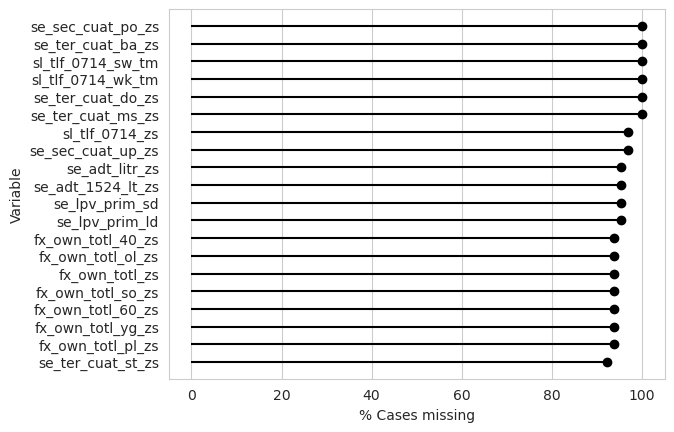

In [90]:
arg_di_df.rename(columns=df_dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(20)

### Adding one column for years of military dictatorship

In [91]:
arg_di_df["year_of_dictatorship"] = arg_di_df["year"].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship)).astype(int)

In [92]:
set_new_dictionary_entry("It was a year of military dictatorship","year_of_dictatorship","year_of_dictatorship")

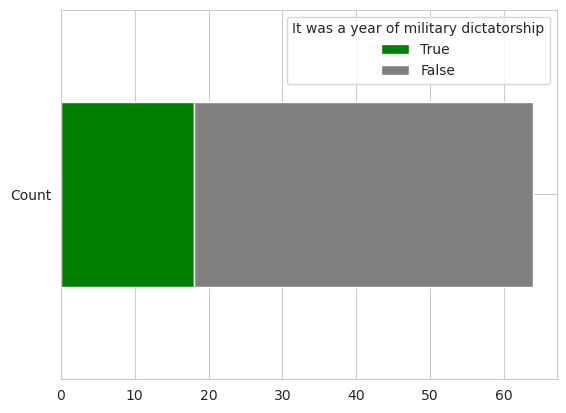

In [93]:
plot_count_of_years_of_military_dictatorship(arg_di_df)

### Exploring missing data of years of military dictatorship

In [94]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year_of_dictatorship'] == 1]
arg_dictorship_years_df.shape

(18, 98)

### Filtering rows and columns with a lot of missing values

Comparing the DataFrame resulting of changing the order of the filters (rows and columns)

In [95]:
print(filter_by_cols_first(arg_di_df, 0.7).shape) # I obtain diffrent shapes when I change the percentage of missing values
print(filter_by_rows_first(arg_di_df, 0.7).shape)

(54, 25)
(8, 71)


I'll work with the first option due to it has more rows and less columns

In [96]:
arg_di_df_best_cases = filter_by_cols_first(arg_di_df, 0.7)
arg_di_df_best_cases.head()

,year,it_mlt_main,ny_gdp_mktp_kd,ny_gdp_mktp_kd_zg,ny_gdp_pcap_kd,ny_gdp_pcap_kd_zg,sp_dyn_le00_in,it_cel_sets,sh_dth_imrt,sh_dth_mort,...,sm_pop_refg,sm_pop_refg_or,sp_rur_totl_zs,se_pre_enrr,se_prm_enrr,se_sec_enrr,se_ter_enrr,se_sec_durs,sp_urb_totl_in_zs,year_of_dictatorship
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,35000.0,NaN,21.120,23.44487,105.769478,44.709621,13.377590,5.0,78.880,1
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,34000.0,NaN,20.679,24.93766,106.752098,45.642109,15.440980,5.0,79.321,1
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,33000.0,NaN,20.257,26.51997,106.286819,47.472710,16.620810,5.0,79.743,1
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,37000.0,NaN,19.842,29.06558,105.710747,49.939709,19.751631,5.0,80.158,1
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,47000.0,NaN,19.433,31.40225,106.127319,52.762390,22.883011,5.0,80.567,0


(12, 25)

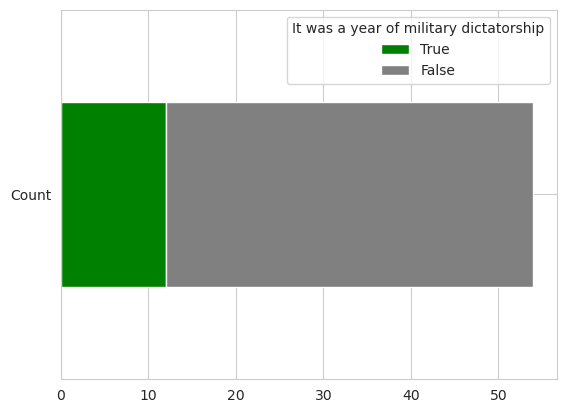

In [97]:
plot_count_of_years_of_military_dictatorship(arg_di_df_best_cases)
arg_di_df_best_cases[arg_di_df_best_cases['year_of_dictatorship'] == 1].shape

### Exploring missing variables

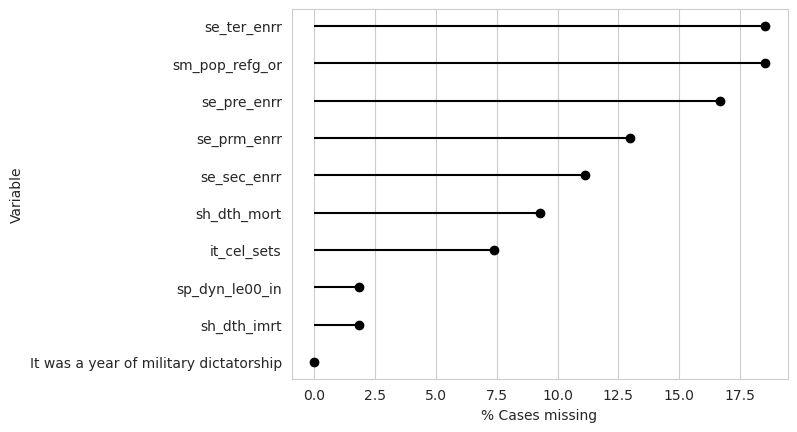

In [98]:
arg_di_df_best_cases.rename(columns=df_dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(10)

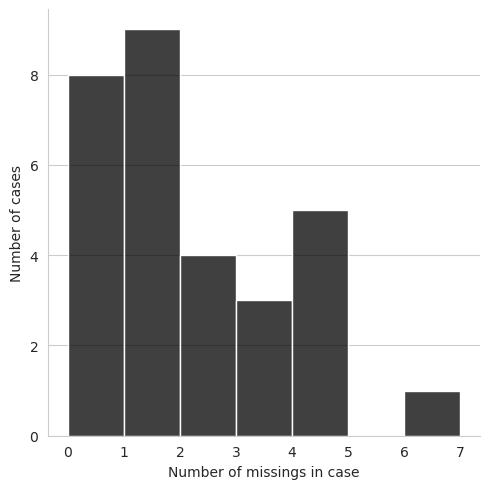

In [99]:
arg_di_df_best_cases.missing.missing_case_plot(30)

#### Getting columns with missing values

In [115]:
columns_with_missing_values = get_columns_with_missing_values(arg_di_df_best_cases)
print(columns_with_missing_values)
[get_indicator_name(item, True) for item in columns_with_missing_values]

['se_ter_enrr', 'sm_pop_refg_or', 'se_pre_enrr', 'se_prm_enrr', 'se_sec_enrr', 'sh_dth_mort', 'it_cel_sets', 'sp_dyn_le00_in', 'sh_dth_imrt']


['School enrollment, tertiary (% gross)',
 'Refugee population by country or territory of origin',
 'School enrollment, preprimary (% gross)',
 'School enrollment, primary (% gross)',
 'School enrollment, secondary (% gross)',
 'Number of under-five deaths',
 'Mobile cellular subscriptions',
 'Life expectancy at birth, total (years)',
 'Number of infant deaths']

##### Missing variable runs

To see more clearly, I plot the missing values. This doesn't show any pattern

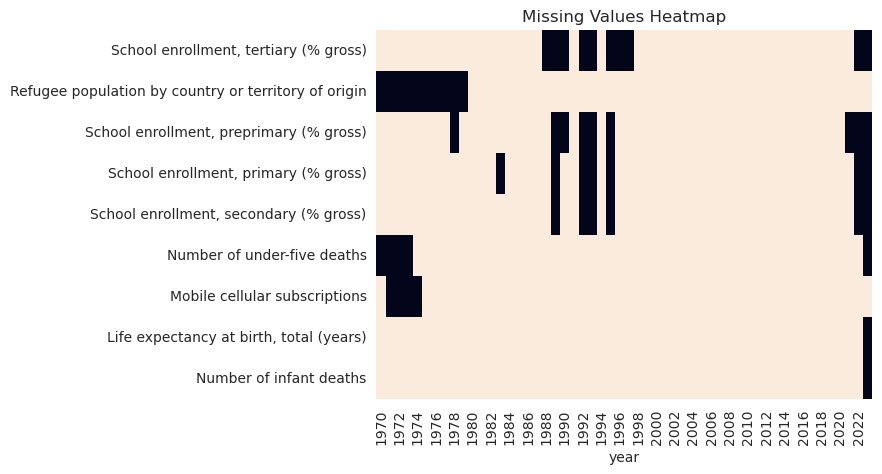

In [109]:
columns_with_names = [{item: get_indicator_name(item, True) for item in columns_with_missing_values}][0]
data = arg_di_df_best_cases[columns_with_missing_values + ['year']].rename(columns=columns_with_names).missing.sort_variables_by_missingness().sort_values(by="year").set_index('year')
sns.heatmap(~data.isnull().T,cbar=False,xticklabels="auto")
plt.title("Missing Values Heatmap")
plt.show()

#### Correlation between missing variables

{
  "se_ter_enrr": "School enrollment, tertiary (% gross)",
  "sm_pop_refg_or": "Refugee population by country or territory of origin",
  "se_pre_enrr": "School enrollment, preprimary (% gross)",
  "se_prm_enrr": "School enrollment, primary (% gross)",
  "se_sec_enrr": "School enrollment, secondary (% gross)",
  "sh_dth_mort": "Number of under-five deaths",
  "it_cel_sets": "Mobile cellular subscriptions",
  "sp_dyn_le00_in": "Life expectancy at birth, total (years)",
  "sh_dth_imrt": "Number of infant deaths"
}


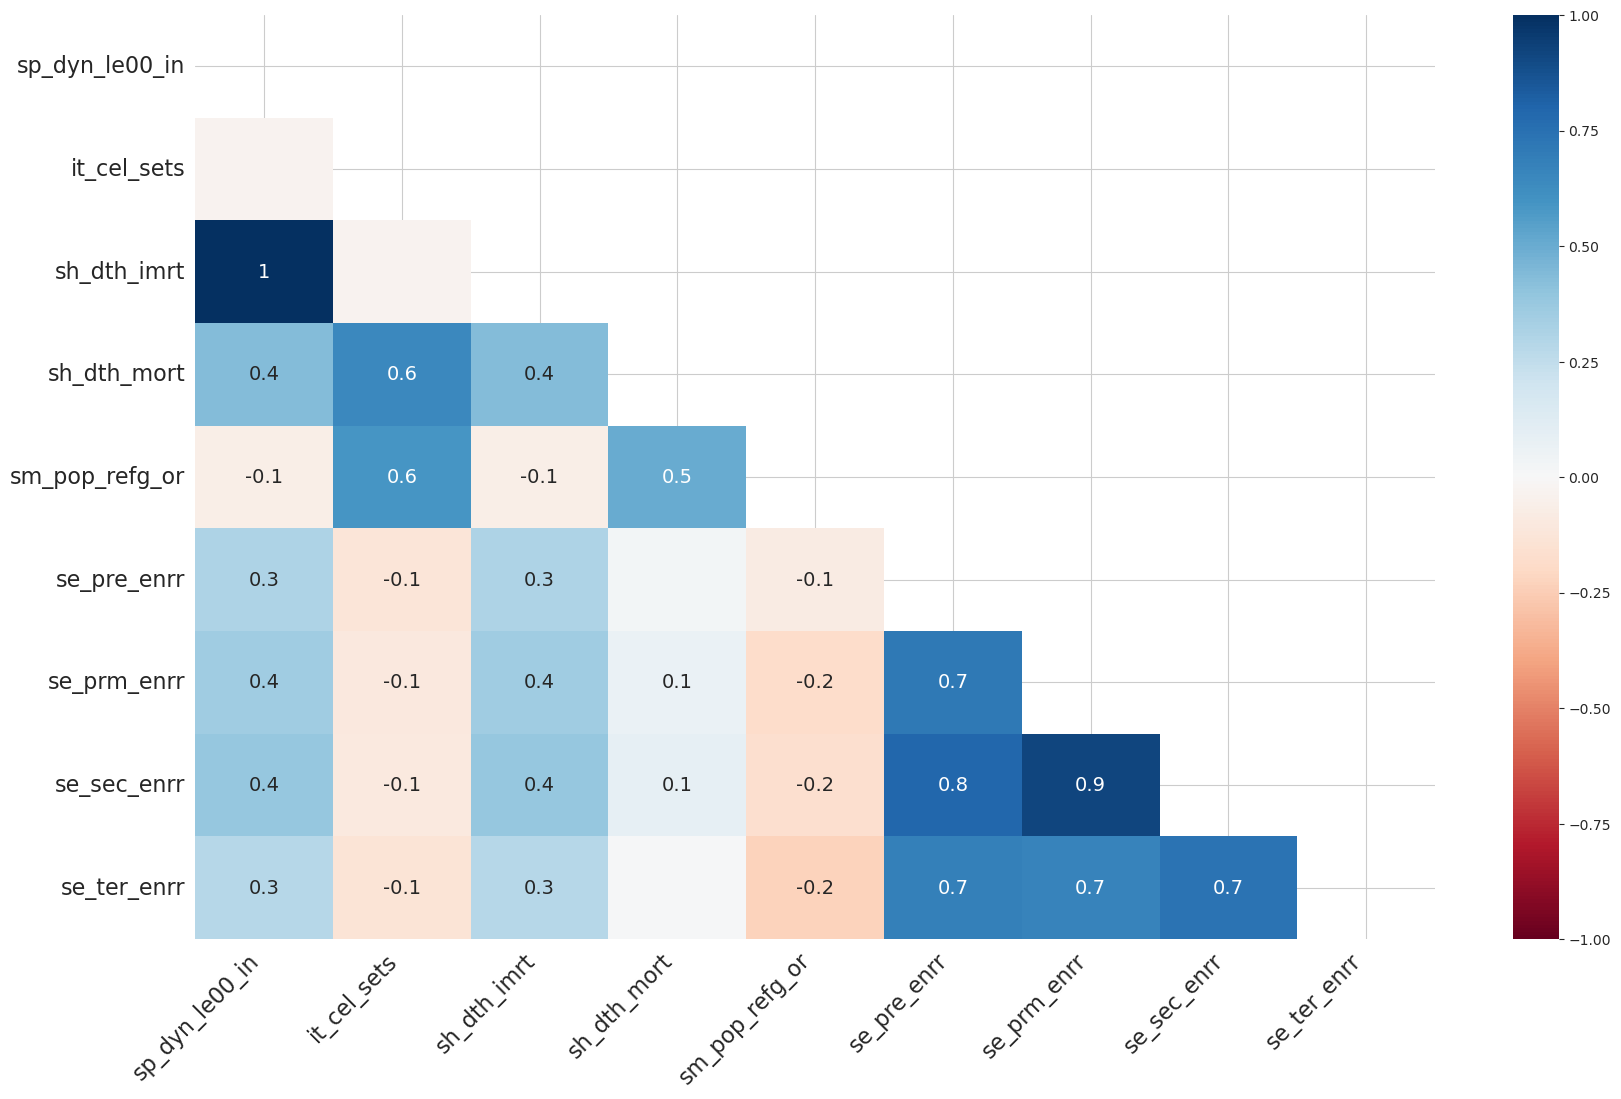

In [117]:
missingno.heatmap(df=arg_di_df_best_cases)
print(json.dumps(columns_with_names, indent=2))

Missing variables grouped by hierachical clusters with high correlation. Correlation is higher when the branchs are closer. 

<Axes: >

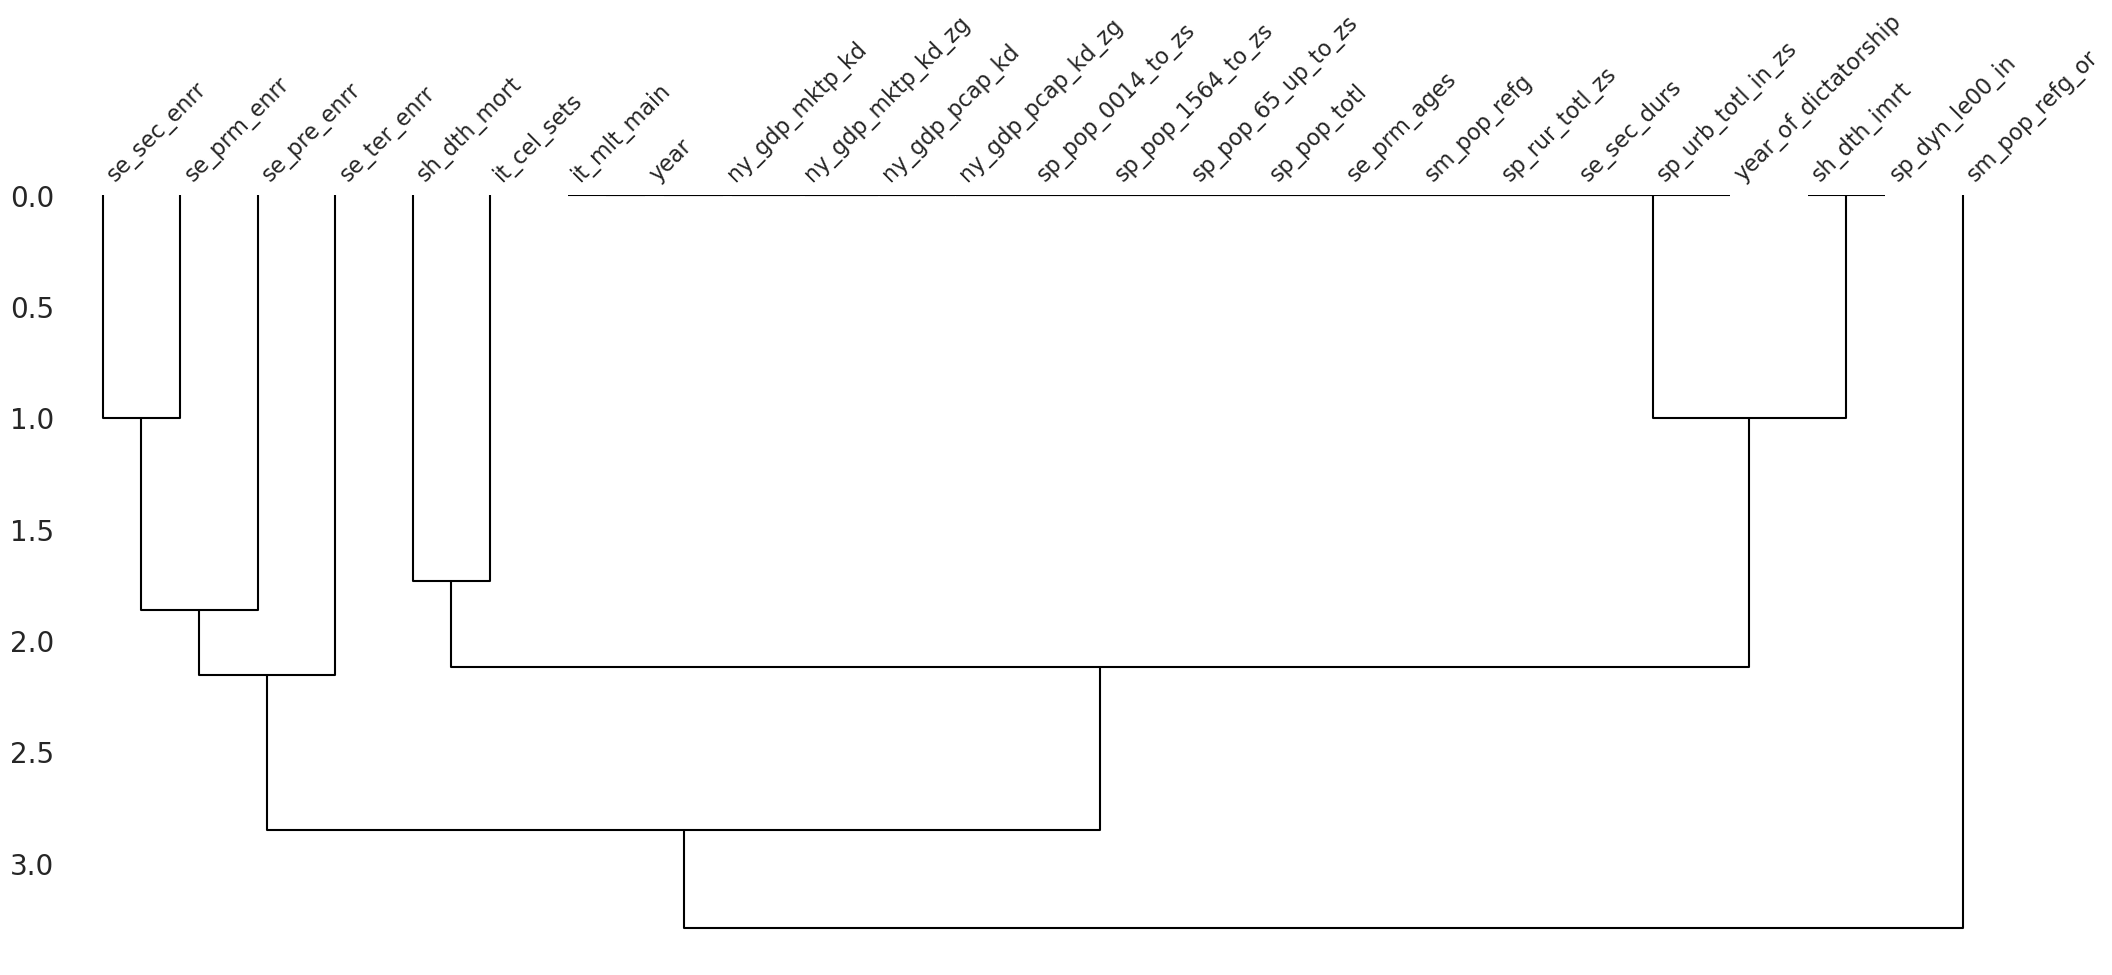

In [118]:
missingno.dendrogram(df=arg_di_df_best_cases)

#### Getting rows with missing values

In [119]:
rows_with_missing_values = arg_di_df_best_cases.set_index('year').T.isna().sum().sort_values(ascending=False)
rows_with_missing_values = rows_with_missing_values[rows_with_missing_values > 0].index
rows_with_missing_values

Index([2023, 1989, 2022, 1995, 1993, 1992, 1972, 1973, 1971, 1990, 1970, 1974,
       1978, 1997, 1979, 1975, 1996, 1976, 1977, 1983, 2021, 1988],
      dtype='int64', name='year')

#### Upsetplot

This plot helps identify where data is complete across multiple indicators and where there might be gaps in the dataset.

**Claude AI explanation:**

An UpSet plot shows the relationships between multiple sets and their intersections. In this visualization:

The left bars show the total size of each set (e.g., IT.CEL.SETS, SH.DTH.MORT, etc.)
The bottom dots and connecting lines indicate which sets intersect
The top bars show the size of these intersections

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

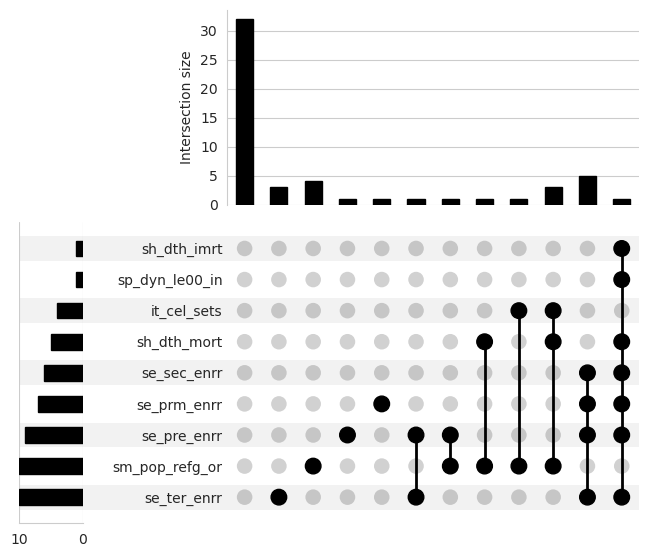

In [120]:
warnings.simplefilter("ignore") # I will ignore the warnings only for this function
arg_di_df_best_cases[columns_with_missing_values].missing.missing_upsetplot()

##### Shadow matrix

In [121]:
shadow_matrix = arg_di_df_best_cases.missing.bind_shadow_matrix(only_missing = True, true_string="Missing", false_string="Not Missing")
shadow_matrix.head()

,year,it_mlt_main,ny_gdp_mktp_kd,ny_gdp_mktp_kd_zg,ny_gdp_pcap_kd,ny_gdp_pcap_kd_zg,sp_dyn_le00_in,it_cel_sets,sh_dth_imrt,sh_dth_mort,...,year_of_dictatorship,sp_dyn_le00_in_NA,it_cel_sets_NA,sh_dth_imrt_NA,sh_dth_mort_NA,sm_pop_refg_or_NA,se_pre_enrr_NA,se_prm_enrr_NA,se_sec_enrr_NA,se_ter_enrr_NA
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,1,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,1,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,1,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,1,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,0,Not Missing,Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing


Getting descriptive statistics of a variable grouped by  _NA variables

In [122]:
list = [shadow_matrix.groupby(item+"_NA")[arg_di_df_best_cases.columns[0]].describe() for item in columns_with_missing_values]
list

[                count         mean        std     min      25%     50%  \
 se_ter_enrr_NA                                                           
 Missing          10.0  1998.500000  12.989312  1988.0  1990.50  1994.0   
 Not Missing      44.0  1996.045455  16.389098  1970.0  1980.75  1999.5   
 
                     75%     max  
 se_ter_enrr_NA                   
 Missing         1996.75  2023.0  
 Not Missing     2010.25  2021.0  ,
                    count    mean        std     min      25%     50%      75%  \
 sm_pop_refg_or_NA                                                               
 Missing             10.0  1974.5   3.027650  1970.0  1972.25  1974.5  1976.75   
 Not Missing         44.0  2001.5  12.845233  1980.0  1990.75  2001.5  2012.25   
 
                       max  
 sm_pop_refg_or_NA          
 Missing            1979.0  
 Not Missing        2023.0  ,
                 count         mean        std     min     25%     50%     75%  \
 se_pre_enrr_NA             

Checking correlation between variables

<Axes: >

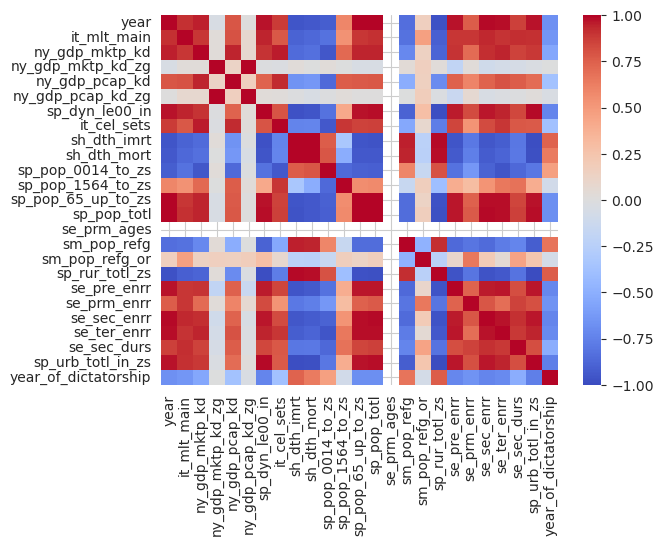

In [123]:
correlation_matrix = arg_di_df_best_cases.corr(numeric_only=True)

sns.heatmap(correlation_matrix, cmap='coolwarm')

In [124]:
arg_di_df_best_cases["year"] = arg_di_df_best_cases["year"]

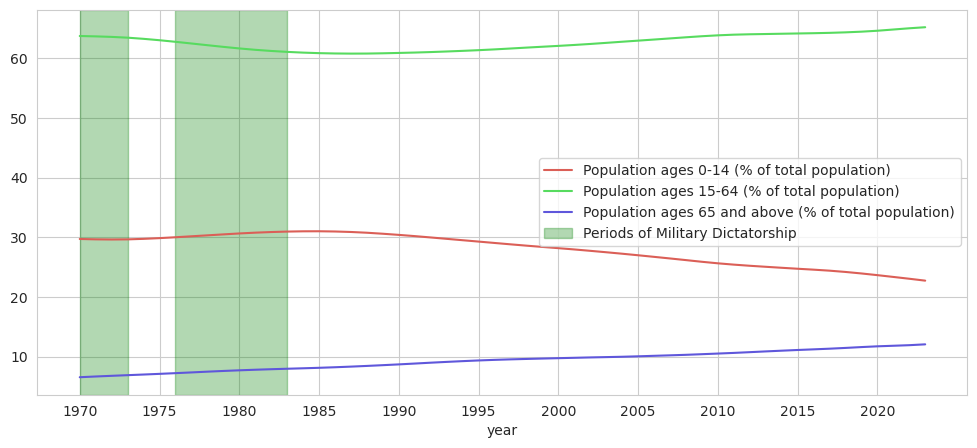

In [128]:
plot_labels = [
    get_indicator_name("sp_pop_0014_to_zs",True),
    get_indicator_name("sp_pop_1564_to_zs",True),
    get_indicator_name("sp_pop_65_up_to_zs",True)
]

time_series(arg_di_df_best_cases, x='year', y=["sp_pop_0014_to_zs","sp_pop_1564_to_zs","sp_pop_65_up_to_zs"], plot_labels=plot_labels)

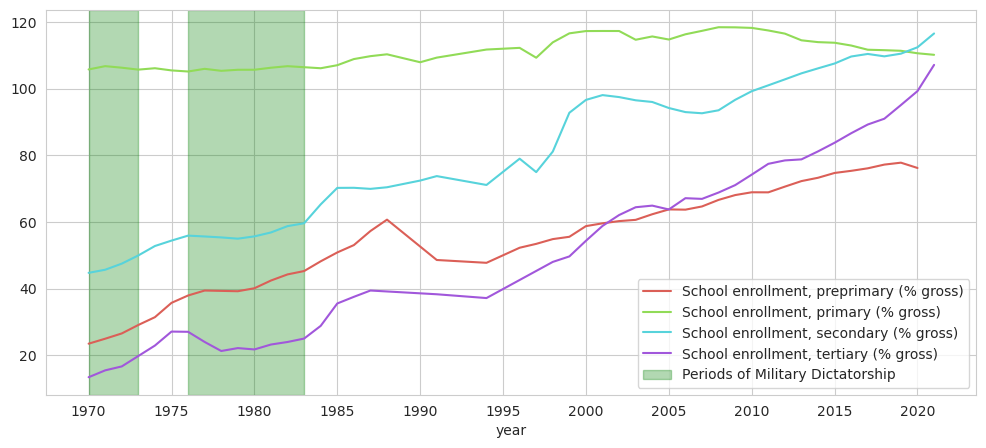

In [129]:
plot_labels = [
    get_indicator_name("se_pre_enrr",True),
    get_indicator_name("se_prm_enrr",True),
    get_indicator_name("se_sec_enrr",True),
    get_indicator_name("se_ter_enrr",True)
]

time_series(arg_di_df_best_cases, x='year', y=["se_pre_enrr","se_prm_enrr","se_sec_enrr","se_ter_enrr"], plot_labels=plot_labels)

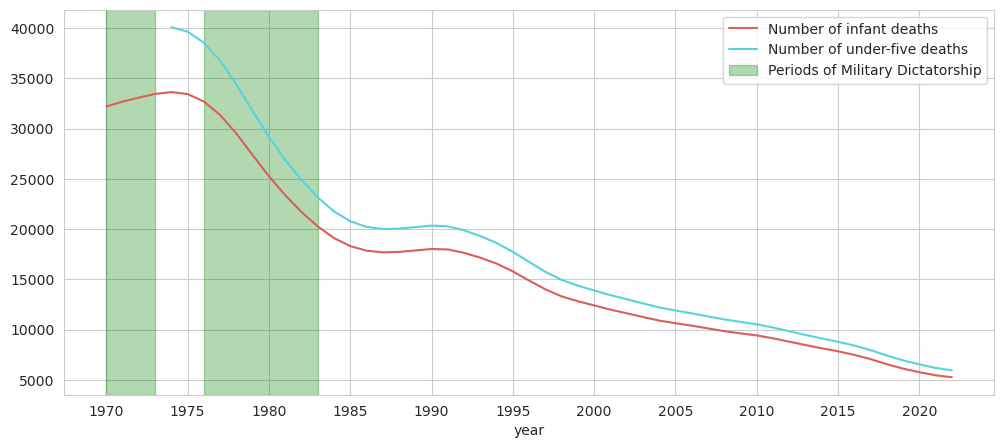

In [130]:
plot_labels = [
    get_indicator_name("sh_dth_imrt",True),
    get_indicator_name("sh_dth_mort",True)
]

time_series(arg_di_df_best_cases, x='year', y=["sh_dth_imrt","sh_dth_mort"], plot_labels=plot_labels)

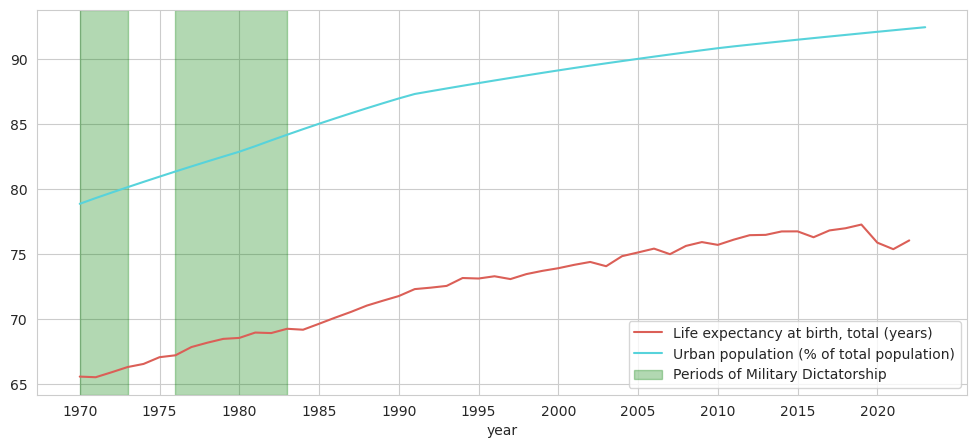

In [131]:
plot_labels = [
    get_indicator_name("sp_dyn_le00_in",True),
    get_indicator_name("sp_urb_totl_in_zs",True)
]

time_series(arg_di_df_best_cases, x='year', y=["sp_dyn_le00_in","sp_urb_totl_in_zs"], plot_labels=plot_labels)

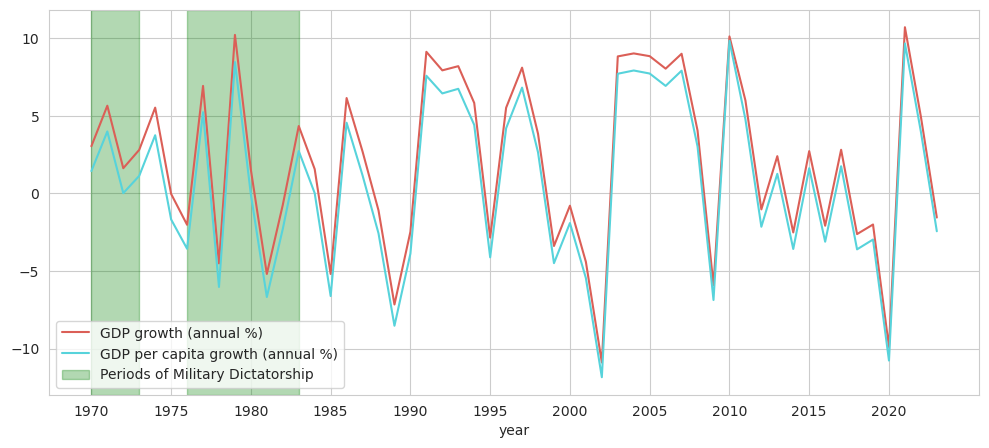

In [133]:
plot_labels = [
    get_indicator_name("ny_gdp_mktp_kd_zg",True),
    get_indicator_name("ny_gdp_pcap_kd_zg",True)
]

time_series(arg_di_df_best_cases, x='year', y=["ny_gdp_mktp_kd_zg","ny_gdp_pcap_kd_zg"], plot_labels=plot_labels)

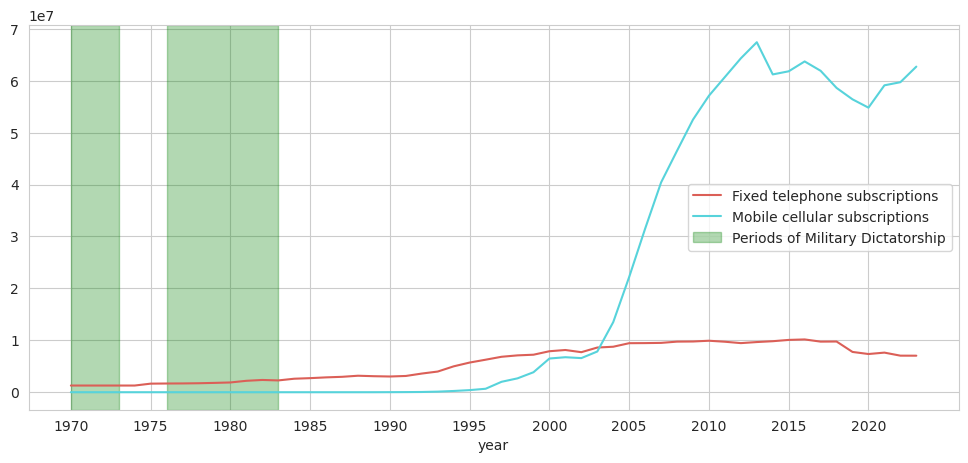

In [134]:
plot_labels = [
    get_indicator_name("it_mlt_main",True),
    get_indicator_name("it_cel_sets",True)
]

time_series(arg_di_df_best_cases, x='year', y=["it_mlt_main","it_cel_sets"], plot_labels=plot_labels)

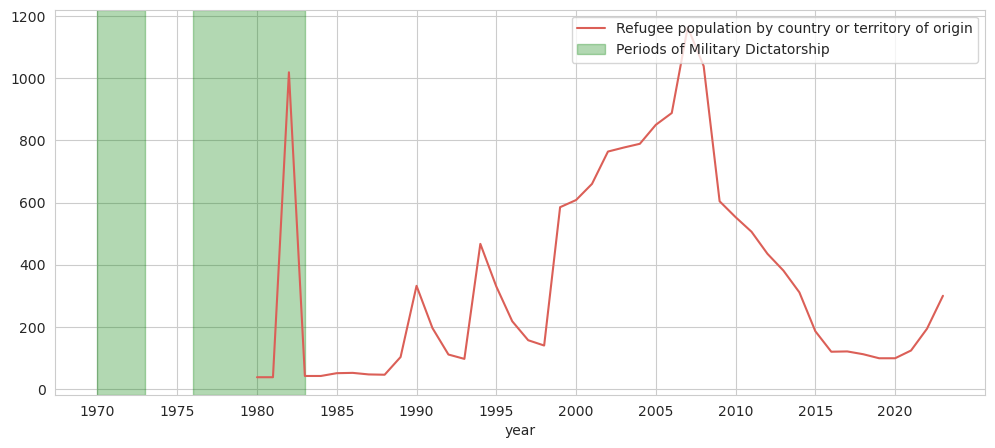

In [135]:
plot_labels = [
    get_indicator_name("sm_pop_refg_or",True),
]

time_series(arg_di_df_best_cases, x='year', y=["sm_pop_refg_or"], plot_labels=plot_labels)

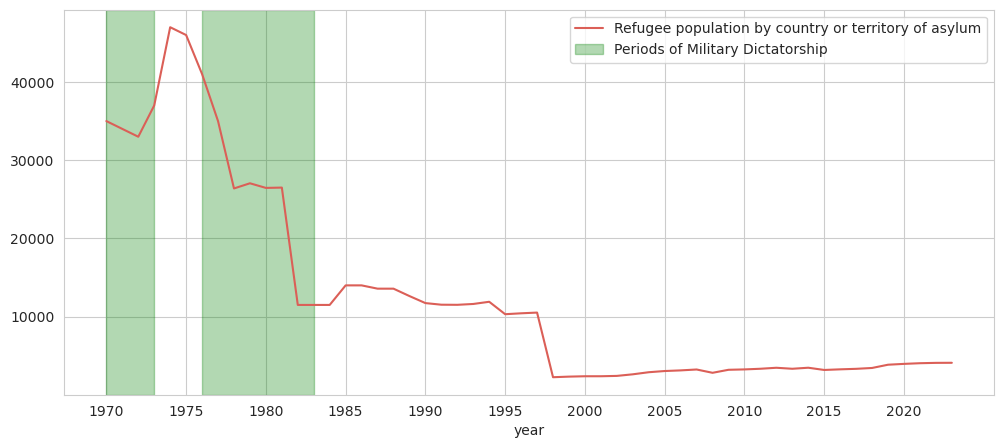

In [136]:
plot_labels = [
    get_indicator_name("sm_pop_refg",True),
]

time_series(arg_di_df_best_cases, x='year', y=["sm_pop_refg"], plot_labels=plot_labels)

#### Detecting outliers

In [137]:
detect_outliers(arg_di_df_best_cases)

Outlier detection
sh_dth_mort
    year  sh_dth_mort
14  1974      40082.0
15  1975      39640.0
16  1976      38536.0
17  1977      36750.0
sm_pop_refg
    year  sm_pop_refg
10  1970      35000.0
11  1971      34000.0
12  1972      33000.0
13  1973      37000.0
14  1974      47000.0
15  1975      46000.0
16  1976      41010.0
17  1977      35000.0


I will keep the original values, because these values ​​seem reasonable compared to the consecutive ones 

#### Plotting variables separated by _NA variables

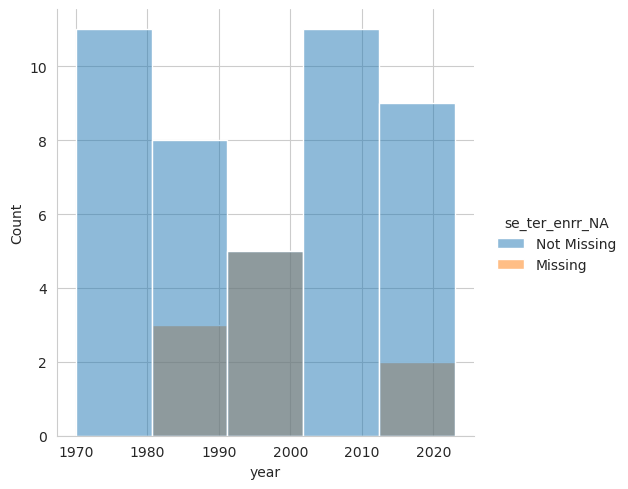

In [139]:
sns.displot(data=shadow_matrix,x=arg_di_df_best_cases.columns[0],kind="hist",hue=columns_with_missing_values[0]+"_NA",bins=5)

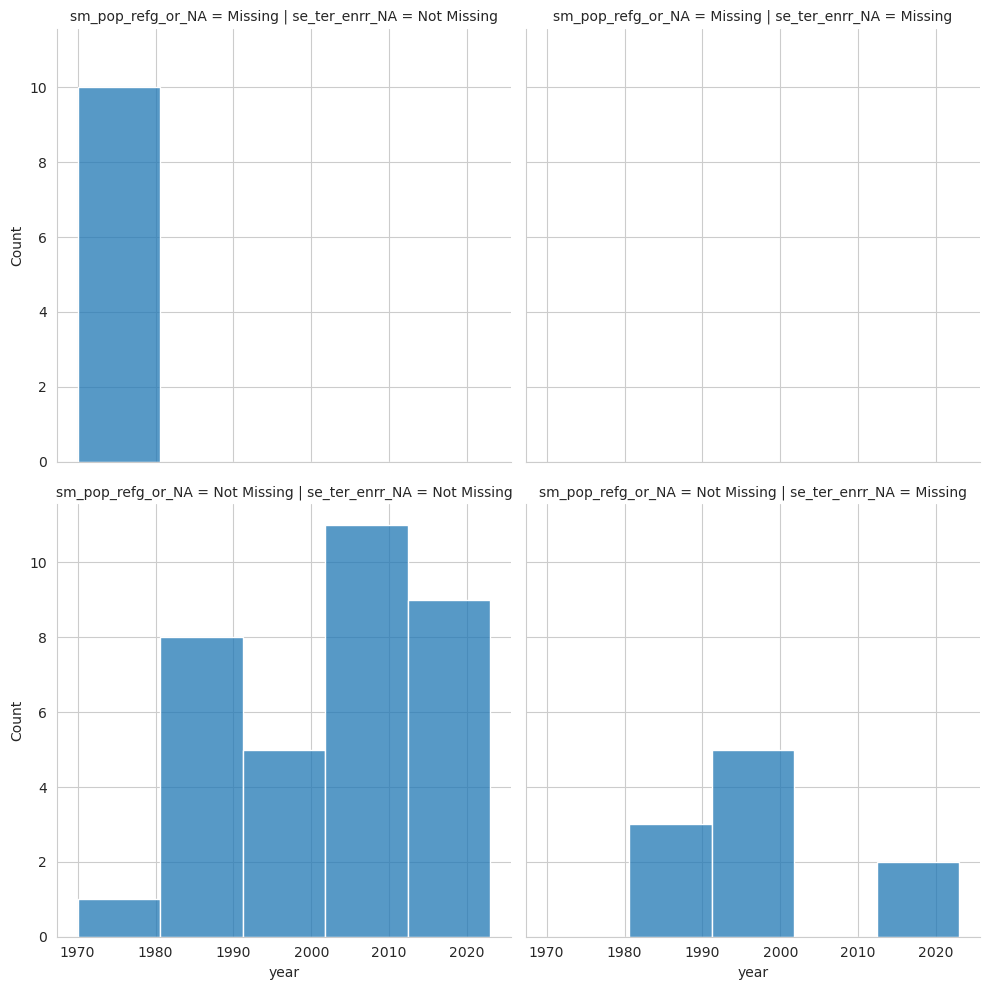

In [140]:
plot_2_missing_vs_variable(shadow_matrix,shadow_matrix.columns[0],columns_with_missing_values[0]+"_NA",columns_with_missing_values[1]+"_NA", bins=5)

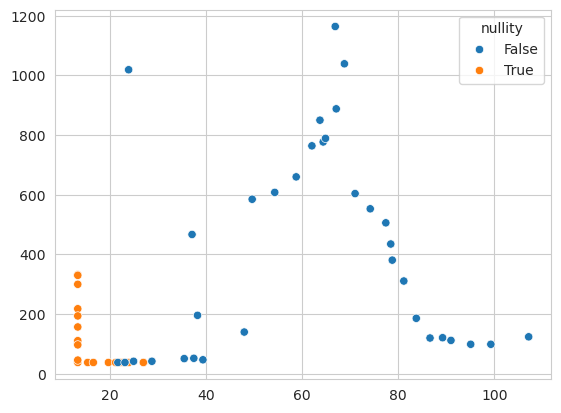

In [141]:
plot_2_missing(shadow_matrix, columns_with_missing_values[0]+"_NA", columns_with_missing_values[1]+"_NA")

#### Imputation by interpolation

In [143]:
print(arg_di_df_best_cases.iloc[0:10][['year','it_cel_sets']])
arg_di_df_best_cases['it_cel_sets'].isna().value_counts()

    year  it_cel_sets
10  1970          0.0
11  1971          NaN
12  1972          NaN
13  1973          NaN
14  1974          NaN
15  1975          0.0
16  1976          0.0
17  1977          0.0
18  1978          0.0
19  1979          0.0


it_cel_sets
False    50
True      4
Name: count, dtype: int64

In [144]:
arg_di_df_best_cases['it_cel_sets'] = arg_di_df_best_cases['it_cel_sets'].ffill()
print(arg_di_df_best_cases.iloc[0:10][['year','it_cel_sets']])
arg_di_df_best_cases['it_cel_sets'].isna().value_counts()

    year  it_cel_sets
10  1970          0.0
11  1971          0.0
12  1972          0.0
13  1973          0.0
14  1974          0.0
15  1975          0.0
16  1976          0.0
17  1977          0.0
18  1978          0.0
19  1979          0.0


it_cel_sets
False    54
Name: count, dtype: int64

#### Imputation by mean

For a single value

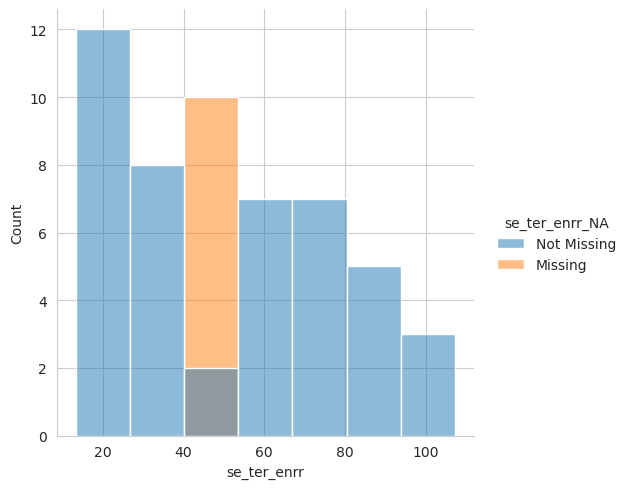

In [145]:
imputation_of_missing_variable(shadow_matrix, columns_with_missing_values[0])


In [146]:
arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index=False)

In [ ]:
session_info.show()